In [61]:
import parse_data.prepare_data as prepare_data
import globals
from plotting import plot_octagon, plot_trajectory
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import data_extraction.get_indices as get_indices
import data_strings
import parse_data.preprocess as preprocess

In [62]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
# data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # laptop octagon

# json_filename = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json']
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json']
# json_filenames = [r'second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json']
# json_filenames = [r'third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json']
# json_filenames = [r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']
json_filenames = [r'seventh_experiments_241113\2024-11-13_14-18-54_NasiaRyanSocial.json']


In [63]:
# json_filenames = data_strings.JSON_FILENAMES_SOCIAL

In [64]:
len(trial_list)

30

In [65]:
# prepare the session dataframe and dataframes of each individual trial
df, trial_list = prepare_data.prepare_data(data_folder, json_filenames, combine=True)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\seventh_experiments_241113\2024-11-13_14-18-54_NasiaRyanSocial.json
Loading complete.
Preprocessing complete.


In [66]:
## Process data prepare trajectories for plotting

In [67]:
## START SECTION

In [68]:
# flip and rotate the location data for each trial so that the High wall
# is at 0 degrees and the Low wall is at 45 degrees (from top)
flip_rotated_trials = []
for i in range(len(trial_list)):
    flip_rotated_trials.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list=trial_list, trial_index=i))

In [69]:
# find trials with a wall separation of 1
single_wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=1)
single_wall_sep_trials = [trial_list[i] for i in single_wall_sep_trial_indices]

In [70]:
# find flipped and rotated versions of all trials with a specific wall seperation between High and Low (note this includes forced trials)
def get_flip_rotated_wall_sep_trials(trial_list, wall_sep=1):
    wall_sep_trial_indices = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=wall_sep)
    wall_sep_trials = [trial_list[i] for i in wall_sep_trial_indices]
    flip_rotated_wall_sep_trials = []
    for i in range(len(wall_sep_trials)):
        flip_rotated_wall_sep_trials.append(flip_rotate_trajectories.flip_rotate_trajectories(wall_sep_trials, trial_index=i))

    return flip_rotated_wall_sep_trials

In [71]:
# run the function above to find trials for 45, 90, and 180 degree wall separations between High and Low
flip_rotated_45_wall_sep_trials = get_flip_rotated_wall_sep_trials(trial_list, wall_sep=1) 
flip_rotated_90_wall_sep_trials = get_flip_rotated_wall_sep_trials(trial_list, wall_sep=2)
flip_rotated_180_wall_sep_trials = get_flip_rotated_wall_sep_trials(trial_list, wall_sep=4)

In [72]:
## END SECTION

In [73]:
## Plotting

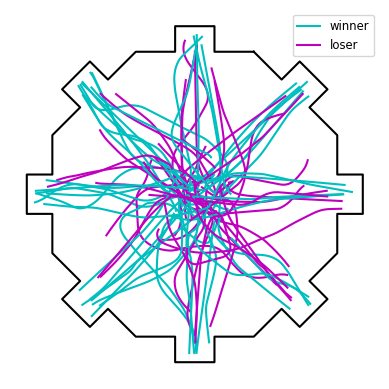

In [74]:
# plot all 45-degree wall separation trials, winning trajectory only
ax = plot_octagon.plot_octagon()
for i in range(len(single_wall_sep_trials)):
    if i == 1:
        ax = plot_trajectory.plot_trial_trajectory(ax, trial_list=single_wall_sep_trials, trial_index=i, label=True)
    else: 
        ax = plot_trajectory.plot_trial_trajectory(ax, trial_list=single_wall_sep_trials, trial_index=i)
# ax.set_title("45-degree wall separation trials,\n winning trajectory only ")

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])


plt.legend( fontsize='small')
plt.show()

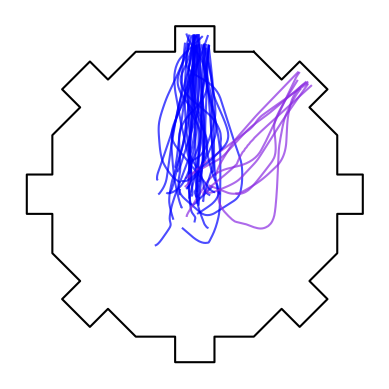

In [75]:
# plot all 45-degree wall separation trials, winning trajectory only (flipped and rotated)
ax = plot_octagon.plot_octagon()
for i in range(len(flip_rotated_45_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial_list=flip_rotated_45_wall_sep_trials, trial_index=i)
# ax.set_title("45-degree wall separation trials,\n winning trajectory only (flipped and rotated)")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

plt.show()

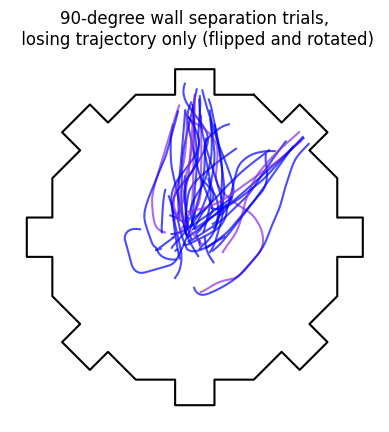

In [76]:
# plot all 45-degree wall separation trials, losing trajectory only (flipped and rotated)
ax = plot_octagon.plot_octagon()
for i in range(len(flip_rotated_45_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial_list=flip_rotated_45_wall_sep_trials, trial_index=i, loser=True)
ax.set_title("90-degree wall separation trials,\n losing trajectory only (flipped and rotated)")

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

plt.show()

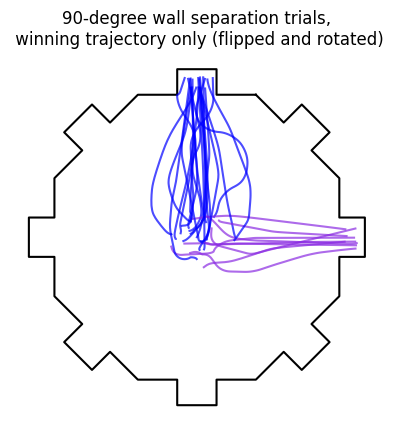

In [77]:
# plot all 90-degree wall separation trials, winning trajectory only (flipped and rotated)
ax = plot_octagon.plot_octagon()
for i in range(len(flip_rotated_90_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial_list=flip_rotated_90_wall_sep_trials, trial_index=i)
ax.set_title("90-degree wall separation trials,\n winning trajectory only (flipped and rotated)")

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

plt.show()

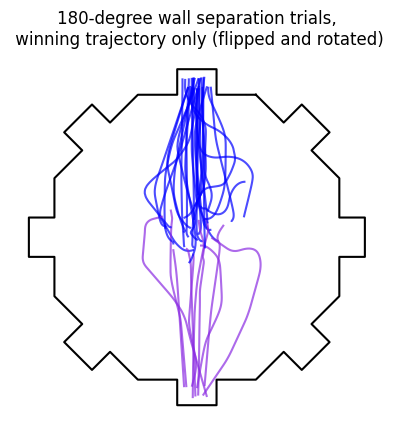

In [78]:
# plot all 180-degree wall separation trials, winning trajectory only (flipped and rotated)
ax = plot_octagon.plot_octagon()
for i in range(len(flip_rotated_180_wall_sep_trials)):
    ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial_list=flip_rotated_180_wall_sep_trials, trial_index=i)
ax.set_title("180-degree wall separation trials,\n winning trajectory only (flipped and rotated)")

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()


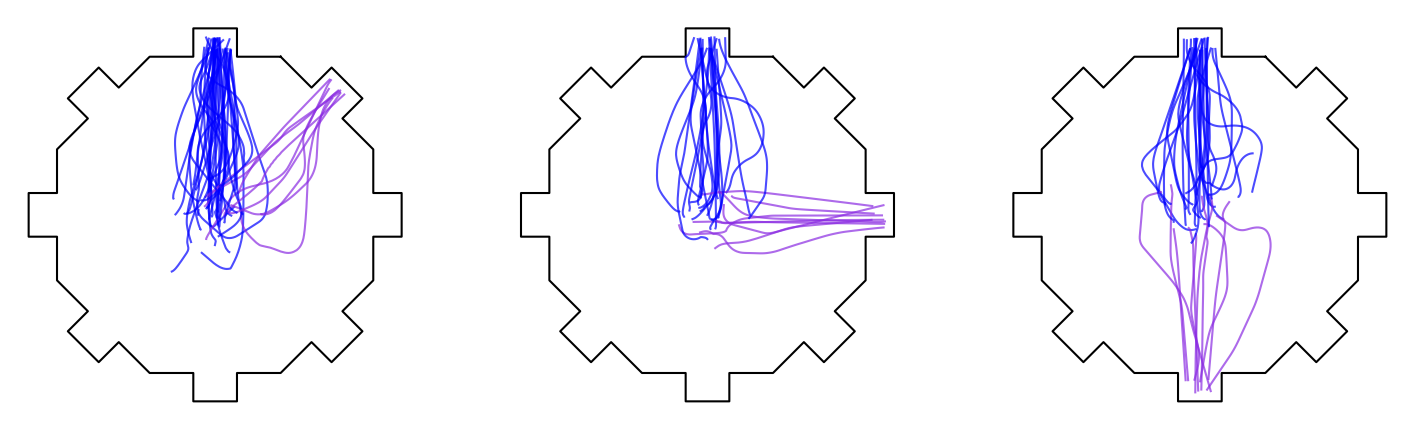

In [79]:
fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_octagon.plot_octagon(axs[0])
for i in range(len(flip_rotated_45_wall_sep_trials)):
    axs[0] = plot_trajectory.plot_trial_winning_trajectory(axs[0], trial_list=flip_rotated_45_wall_sep_trials, trial_index=i)

for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_octagon.plot_octagon(axs[1])
for i in range(len(flip_rotated_90_wall_sep_trials)):
    axs[1] = plot_trajectory.plot_trial_winning_trajectory(axs[1], trial_list=flip_rotated_90_wall_sep_trials, trial_index=i)

for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_octagon.plot_octagon(axs[2])
for i in range(len(flip_rotated_180_wall_sep_trials)):
    axs[2] = plot_trajectory.plot_trial_winning_trajectory(axs[2], trial_list=flip_rotated_180_wall_sep_trials, trial_index=i)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()


In [80]:
flip_rotated_trial1 = flip_rotate_trajectories.flip_rotate_trajectories(trial_list, trial_index=1)

Text(0.5, 1.0, 'single trial trajectory, both winner and loser')

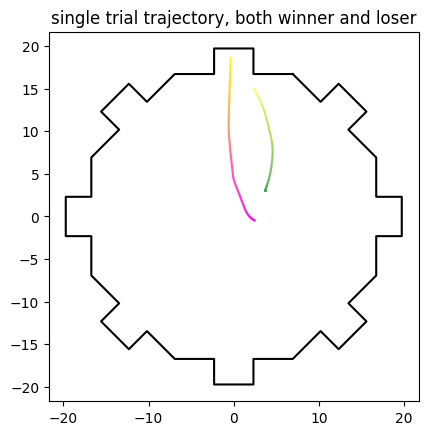

In [81]:
# plot a single trial trajectory, both winner and loser
ax = plot_octagon.plot_octagon()
ax = plot_trajectory.plot_trial_trajectory_colour_map(ax, trial=flip_rotated_trial1)
ax.set_title("single trial trajectory, both winner and loser")

In [82]:
def mark_session_slice_onsets(ax, df, chosen_player, s=2, color='k'):
    ''' Plot markers overlaying a full session trajectory plot,
        indicating position of slice onset'''

    slice_onset_indices = df[df['eventDescription'] == globals.SLICE_ONSET].index
    slice_onset_indices = np.array([i for i in slice_onset_indices])

    # find x and y location values for slice onset indicies
    x_loc_slice_onsets = df[globals.PLAYER_LOC_DICT[chosen_player]['xloc']].loc[slice_onset_indices]
    y_loc_slice_onsets = df[globals.PLAYER_LOC_DICT[chosen_player]['yloc']].loc[slice_onset_indices]

    # plot these locations as markers on an existing plot (expected to have a full session trajectory)
    ax.scatter(x_loc_slice_onsets, y_loc_slice_onsets, color=color, s=s)


    return ax

In [83]:
def plot_session_trajectory(ax, df, colour_player_1='skyblue', colour_player_2='coral', alpha=0.7, chosen_player=None, slice_onset_markers=False):
    ''' Plot the continuous trajectory for an entire session for each player '''

    # find number of players to plot for
    num_players = preprocess.num_players(df)

    # extract all of the relevant players' coordinates from the dataframe by first
    # creating an array of correct labels for extraction
    coordinate_array_labels = []
    for i in range(num_players):
        coordinate_array_labels.extend((globals.PLAYER_LOC_DICT[i]['xloc'], globals.PLAYER_LOC_DICT[i]['yloc'])) 
    
    # use the labels array to extract the relevant player trajectory coordinates 
    coordinate_arrays = {label : df[label].values for label in coordinate_array_labels}
    
    # plot each players trajectory
    # if choosing a specific player, only plot this player's trajectory
    colours = [colour_player_1, colour_player_2, 'g', 'r', 'b', 'y']
    for i in range(num_players):
        if chosen_player is None:
            ax.plot(coordinate_arrays[coordinate_array_labels[2*i]], coordinate_arrays[coordinate_array_labels[2*i+1]], markersize=1, color=colours[i], alpha=alpha, label=f'player {i+1}')
        else:
            if i != chosen_player:
                pass
            else:
                ax.plot(coordinate_arrays[coordinate_array_labels[2*i]], coordinate_arrays[coordinate_array_labels[2*i+1]], markersize=1, color=colours[i], alpha=alpha, label=f'player {i+1}')

    # add title
    main_title = "Whole session trajectory" 
    title_supp = f" for player {chosen_player+1}" if chosen_player is not None else ""
    title_string = main_title + title_supp
    ax.set_title(title_string)
        

    return ax

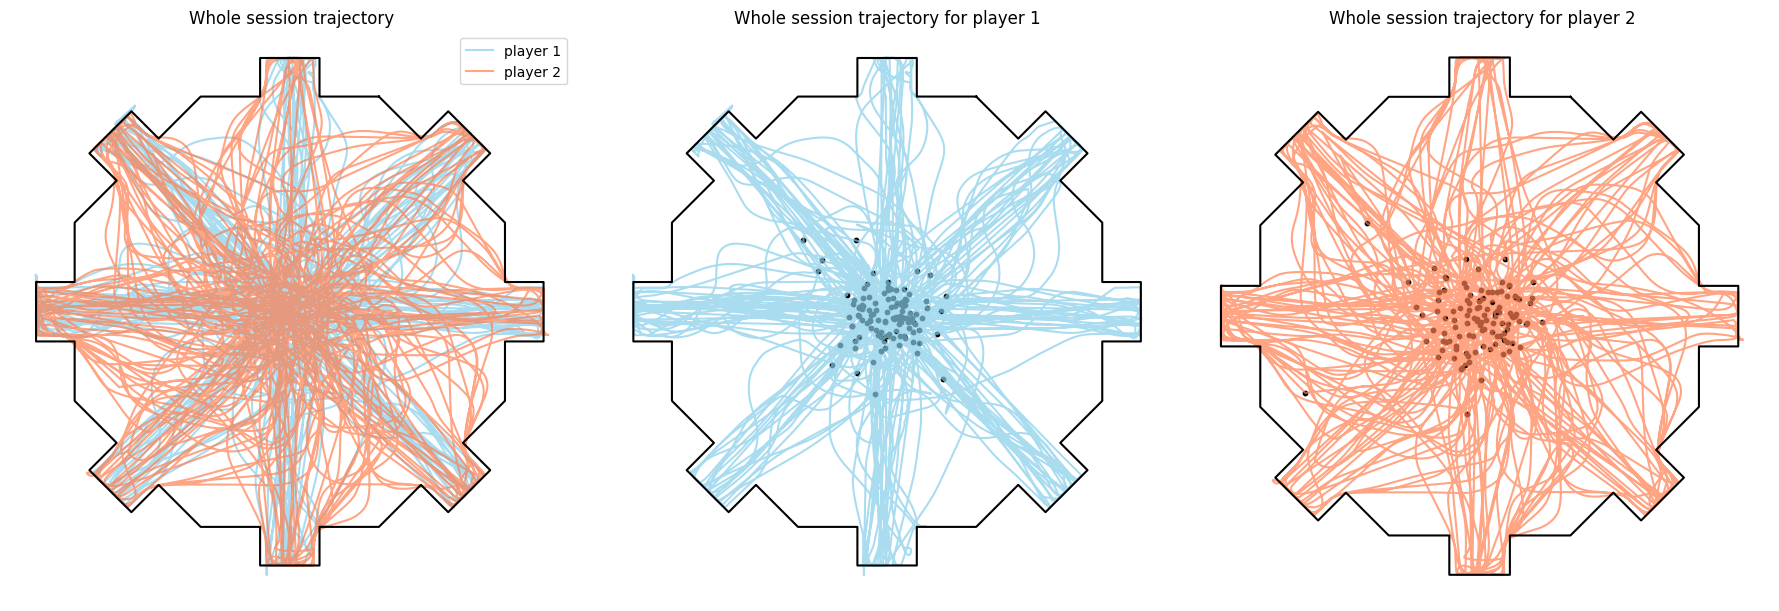

In [ ]:
# plot the full session trajectory for player 0, player 1, and combined

fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], df)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], df, chosen_player=0)
axs[1] = plot_trajectory.mark_session_slice_onsets(axs[1], df, chosen_player=0, s=10)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_trajectory.plot_session_trajectory(axs[2], df, chosen_player=1)
axs[2] = plot_octagon.plot_octagon(axs[2])
axs[2] = plot_trajectory.mark_session_slice_onsets(axs[2], df, chosen_player=1, s=10)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])


axs[0].legend()

plt.tight_layout()

plt.show()


In [60]:
json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json']
df, trial_list = prepare_data.prepare_data(data_folder, json_filenames, combine=True)
json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-53-34_YansuSecondSolo.json']
df2, trial_list2 = prepare_data.prepare_data(data_folder, json_filenames, combine=True)



filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-53-34_YansuSecondSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.


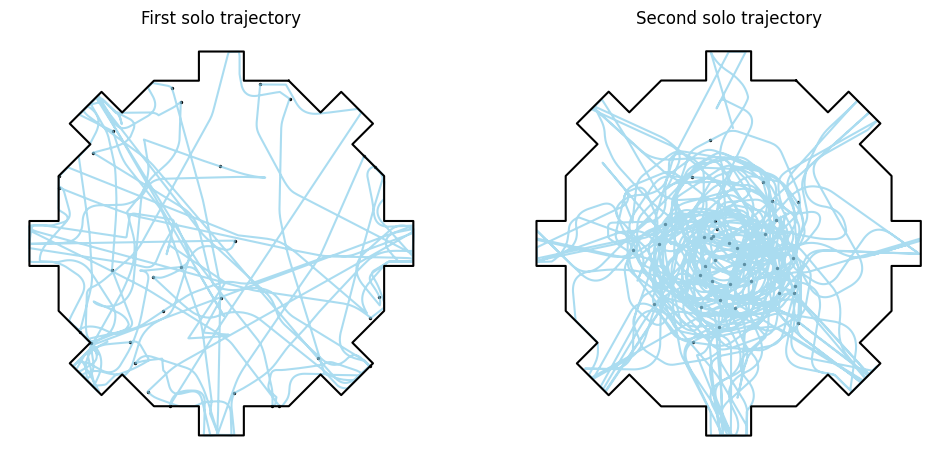

In [32]:
fig, axs = plt.subplots(1,2,figsize=(10*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], df, alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[0], df, chosen_player=0)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
axs[0].set_title("First solo trajectory")

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], df2, alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[1], df2, chosen_player=0)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_title("Second solo trajectory")
plt.show()
